## Figure 1b

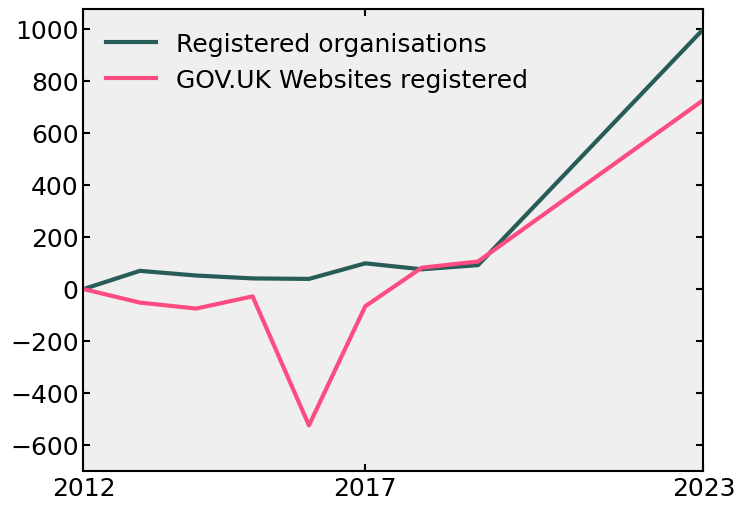

In [2]:
# imports
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import pandas as pd

# Load dataframe df_domains here
domains_data = pd.read_csv('../data/processed/201210-202303-govuk-domain-names-processed.csv')

# Create a new figure with a white background
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor('white')

ax.set_facecolor('#efefef')

# Calculate the differences for the series
diff_organisation = domains_data.groupby('Year')['Organisation'].nunique().diff()
diff_domain = domains_data.groupby('Year')['Domain_name'].nunique().diff()

# Set inital value to zero 
diff_domain.iloc[0] = 0
diff_organisation.iloc[0] = 0

# Plot the series
sns.lineplot(data=diff_organisation[:], ax=ax, linewidth=3, label='Registered organisations', color='#275c58')
sns.lineplot(data=diff_domain[0:], ax=ax, linewidth=3, label='GOV.UK Websites registered', color='#fc4c81')

# Customize the plot
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('', fontsize=20)
ax.grid(False)  # Remove gridlines

# Increase the line widths and axes line widths
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)

# Set x-axis ticks to [2012, 2017, 2023]
ax.set_xticks([2012, 2017, 2023])
ax.set_xticklabels(['2012', '2017', '2023'], fontsize=18)

# Set the limits
plt.ylim(-700)
plt.xlim(2012,2023)

# Set y-axis font size
plt.yticks(fontsize=18)

# Despine the plot
# sns.despine()

# Add a legend without a box
ax.legend(fontsize=18, frameon=False, loc='upper left')

# Control tick visibility
ax.tick_params(axis='both', which='both', top='both', right='both', direction='in', length=5, width=1.5)

# Save the plot 
plt.savefig('../reports/figures/fig1a.png', dpi=1200, bbox_inches='tight')

## Figure 1c

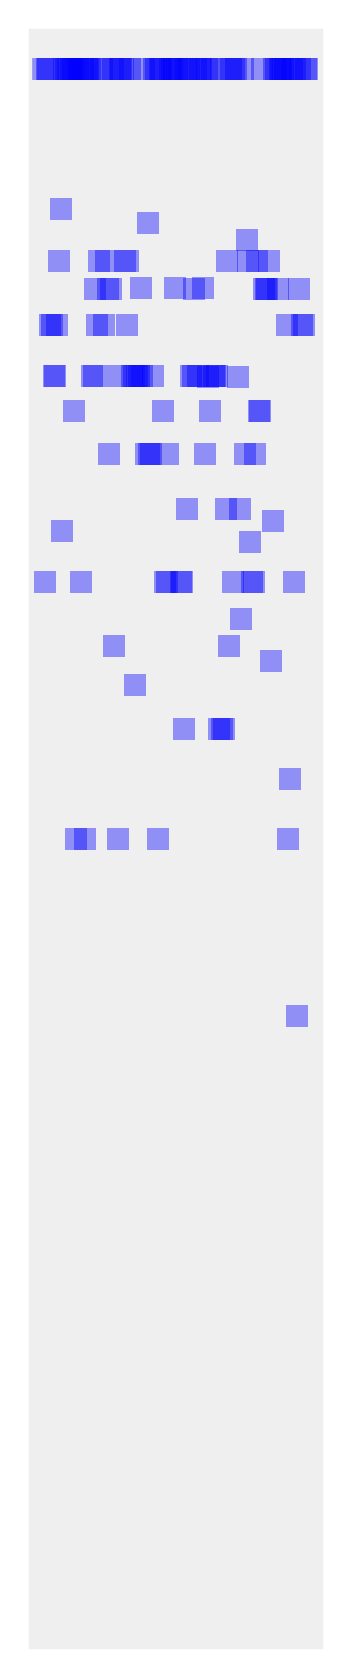

In [5]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_one_axis_distribution(values, save=False):
    # Set the figure size for portrait layout
    plt.figure(figsize=(1.25, 7), dpi=300, frameon=False)

    # Generate x-coordinates with less jitter to minimize overlap
    jittered_x = np.linspace(-0.1, 0.1, len(values))  # Adjust the range as needed

    # Create a blue background for the axes
    ax = plt.gca()
    ax.set_facecolor('#efefef')

    # Plot the values as red markers with jittered x-coordinates
    plt.scatter(jittered_x, values, color='blue', marker='s', s=30, alpha=0.4, edgecolors=None, linewidth=0)

    # Set the y-axis limits to match the range (-1 to 1)
    plt.ylim(-1.05, 1.05)

    # Remove x-axis and y-axis ticks and labels
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.spines['bottom'].set_color('#efefef')
    ax.spines['top'].set_color('#efefef')
    ax.spines['right'].set_color('#efefef')
    ax.spines['left'].set_color('#efefef')

    # Save the plot
    if save == True:
        plt.savefig('../reports/figures/fig1b-a.png', dpi=300, bbox_inches='tight')
    else:
        plt.show()

# Load the dataframe
analysis_df = pd.read_pickle('../data/processed/dataframes/analysis-df-w-api-data.pkl')

# Example usage:
values = analysis_df.loc[analysis_df['priority'] == False].RTI
plot_one_axis_distribution(values, save=True)